In [1]:
from pathlib import Path

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
from PubTabNetDataset import PubTabNet
from TesseractUtils import im_to_data, scale

In [ ]:
colors = list(mcolors.TABLEAU_COLORS.keys())
n_colors = len(colors)

In [4]:
import cv2
COLORS = {
    'black':(0,0,0),
    'red':(150,0,0),
    'green':(0,150,0),
    'blue':(0,0,150)
}

def draw(im, bbox, color='black'):
    im = np.array(im)  # in case it is in PIL format
    x,y,w,h = bbox
    W,H,_ = im.shape
    
    if isinstance(color, str):
        color = COLORS[color]
    
    pt1 = (x, y)
    pt2 = (x+w, y+h)
    return cv2.rectangle(im, pt1=pt1, pt2=pt2,
        color=color, thickness=1
    )

In [5]:
data_dir = Path(r"C:\Users\stans\Documents\Projects\Datasets\pubtabnet.tar\pubtabnet\pubtabnet")
train_dir = data_dir / "train"
target_path = data_dir / "PubTabNet_2.0.0.jsonl"
TrainDataset = PubTabNet(train_dir)

In [7]:
im, _ = TrainDataset[0]

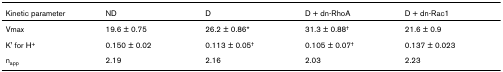

In [8]:
im

In [12]:
bw = np.array(im.getchannel(0))<200

In [18]:
points = []
h,w = bw.shape
for i in range(h):
    for j in range(w):
        if bw[i,j]:
            points.append([i,j])

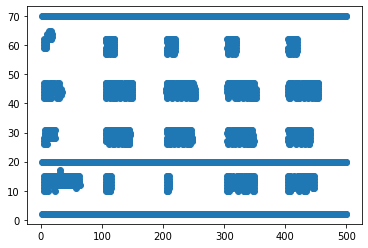

In [79]:
x,y = zip(*points)
plt.scatter(y,x)

In [28]:
from sklearn.cluster import DBSCAN

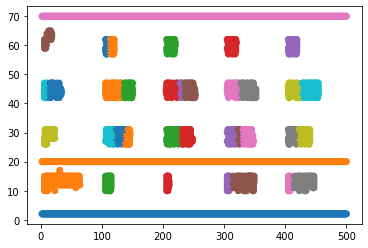

In [67]:
model = DBSCAN(eps = 3)
c = model.fit_predict(points)
c = [colors[x%n_colors] for x in c]
plt.scatter(y,x,c=c)

In [68]:
from sklearn.mixture import GaussianMixture as GMM

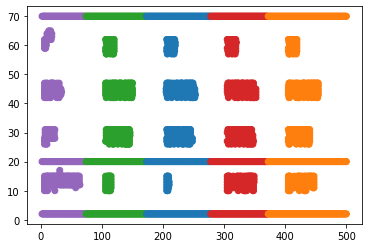

In [83]:
model = GMM(n_components=5)
c = model.fit_predict([[y] for x,y in points])
c = [colors[x%n_colors] for x in c]
plt.scatter(y,x,c=c)

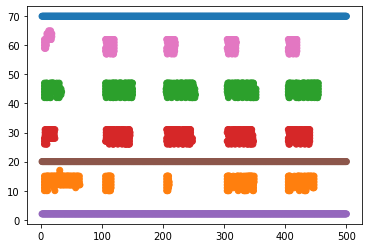

In [149]:
def GMM_cov(points, axis, n_components):
    model = GMM(n_components=n_components,covariance_type="tied")
    y = model.fit_predict([[x[axis]] for x in points])
    cov = model.covariances_
    return y, cov.mean()

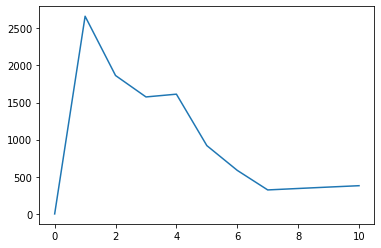

In [164]:
im, _ = TrainDataset[1]
bw = np.array(im.getchannel(0))<100
points = []
h,w = bw.shape
for i in range(h):
    for j in range(w):
        if bw[i,j]:
            points.append([i,j])
covs = [0]
for i in range(10,20):
    covs.append(GMM_cov(points, 0, i)[1]*i**2)
plt.plot(covs)

1.2613062767351615

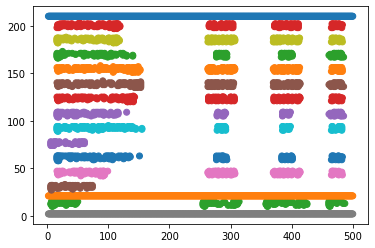

In [167]:
x,y = zip(*points)
c, cov = GMM_cov(points, 0, 16)
c = [colors[x%n_colors] for x in c]
plt.scatter(y,x,c=c)
cov

In [171]:
from sklearn.cluster import KMeans as KM
from sklearn.metrics import silhouette_score

4


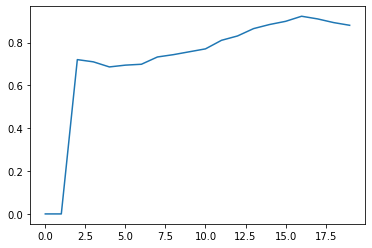

In [183]:
im, _ = TrainDataset[1]
bw = np.array(im.getchannel(0))<100
points = []
h,w = bw.shape
for i in range(h):
    for j in range(w):
        if bw[i,j]:
            points.append([i,j])
covs = [0,0]
for i in range(2,20):
    model = KM(i)
    X = [[x] for x,y in points]
    c = model.fit_predict(X)
    covs.append(silhouette_score(X, model.labels_))
print(covs.index(min(covs[2:])))
plt.plot(covs)

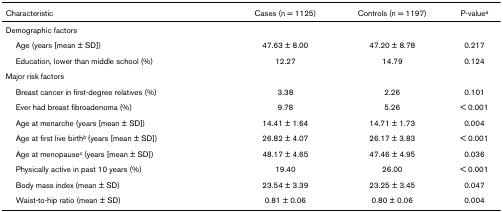

In [175]:
im